In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
import datetime
from scipy import stats

In [26]:
finres = pd.read_csv('./input/finres.csv')


In [40]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

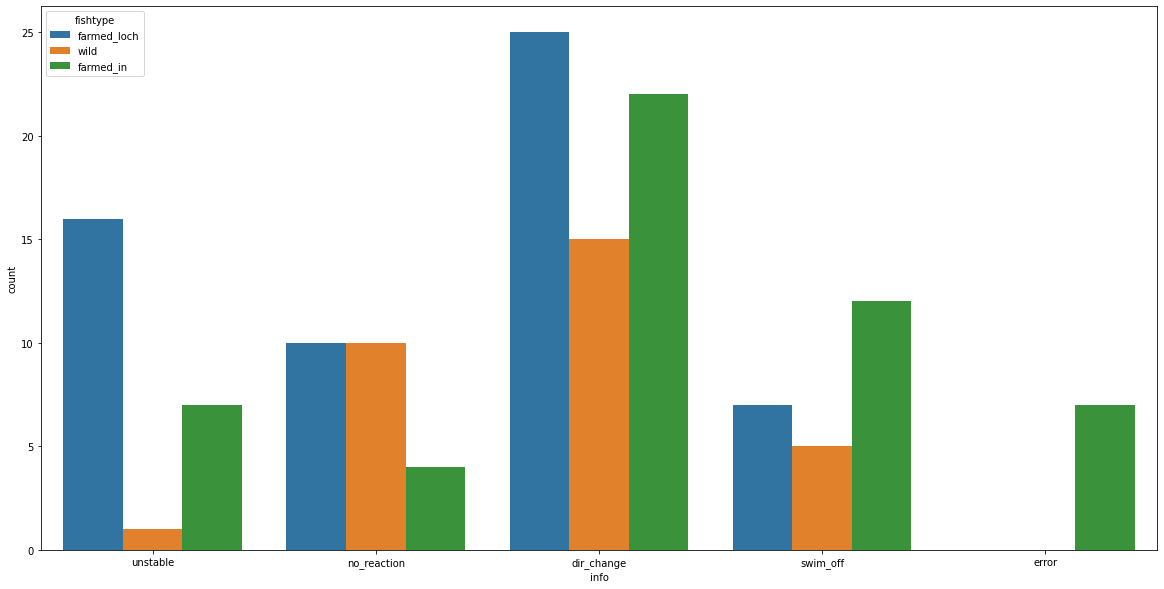

dir_change     62
swim_off       24
no_reaction    24
unstable       24
error           7
Name: info, dtype: int64

In [56]:

sns.countplot(data=finres, x='info', hue = 'fishtype' )
plt.show()
finres['info'].value_counts()
#finres['info'].value_counts(normalize=True) * 100

In [46]:
finres['absstable10']=abs(finres['stable10prev'])
finres['fdistcm'] = 0.6 * finres['fdist']

In [49]:
finres['fishtype'].value_counts()

farmed_loch    58
farmed_in      52
wild           31
Name: fishtype, dtype: int64

/Users/mix/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mix/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


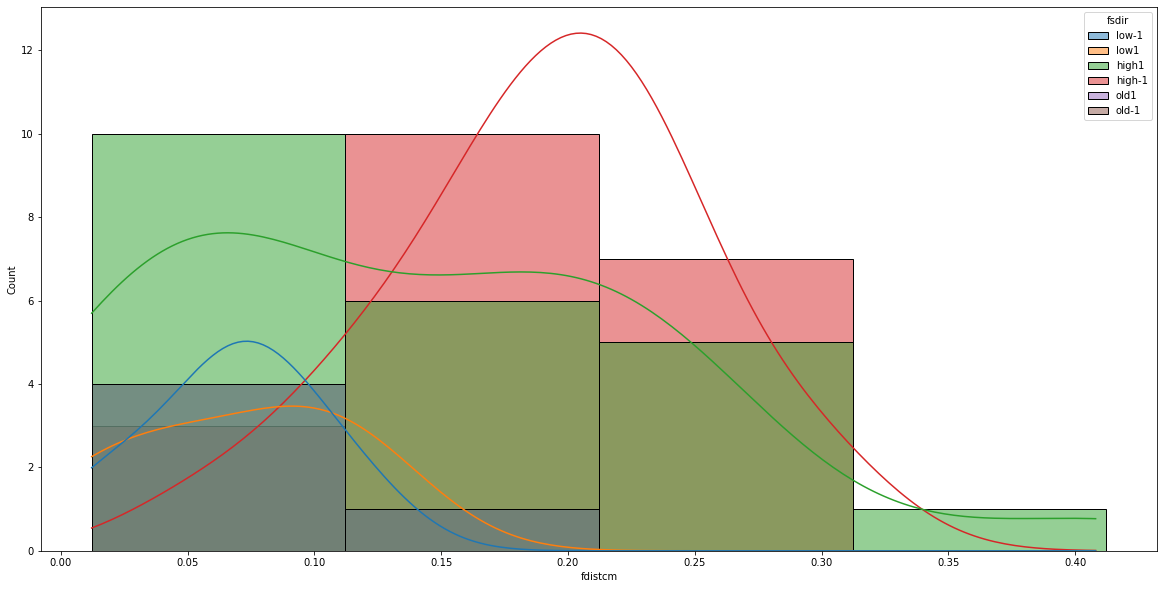

In [47]:
sns.histplot(data=finres, x='fdistcm' , hue='fsdir',binwidth=0.1,kde=True)
plt.show()


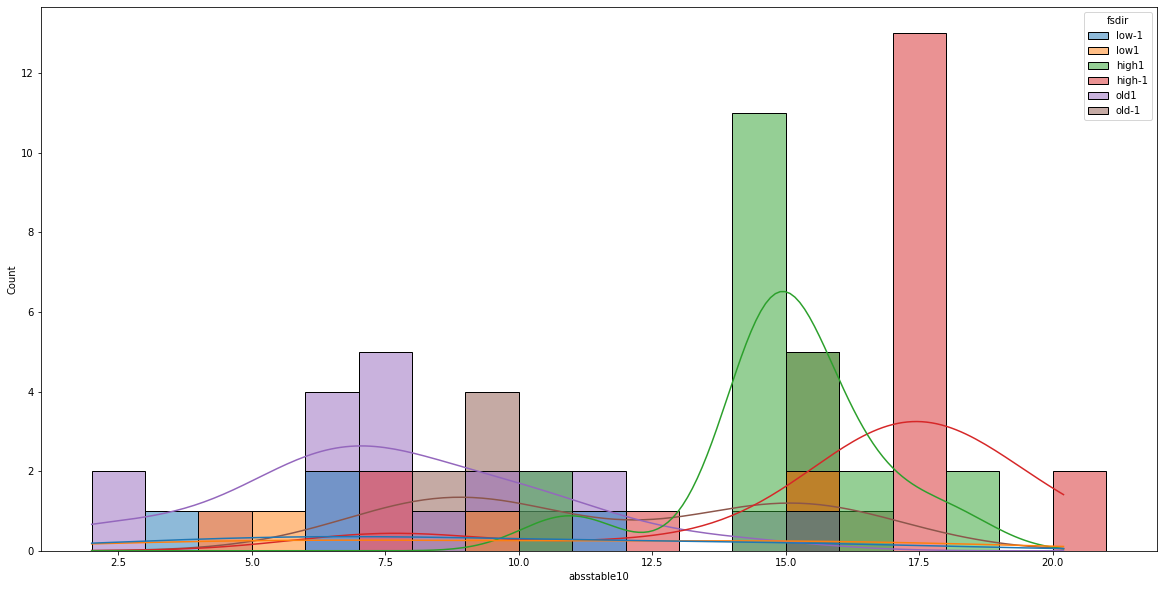

In [45]:
sns.histplot(data=finres, x='absstable10', hue = 'fsdir' ,binwidth=1,kde=True)
plt.show()


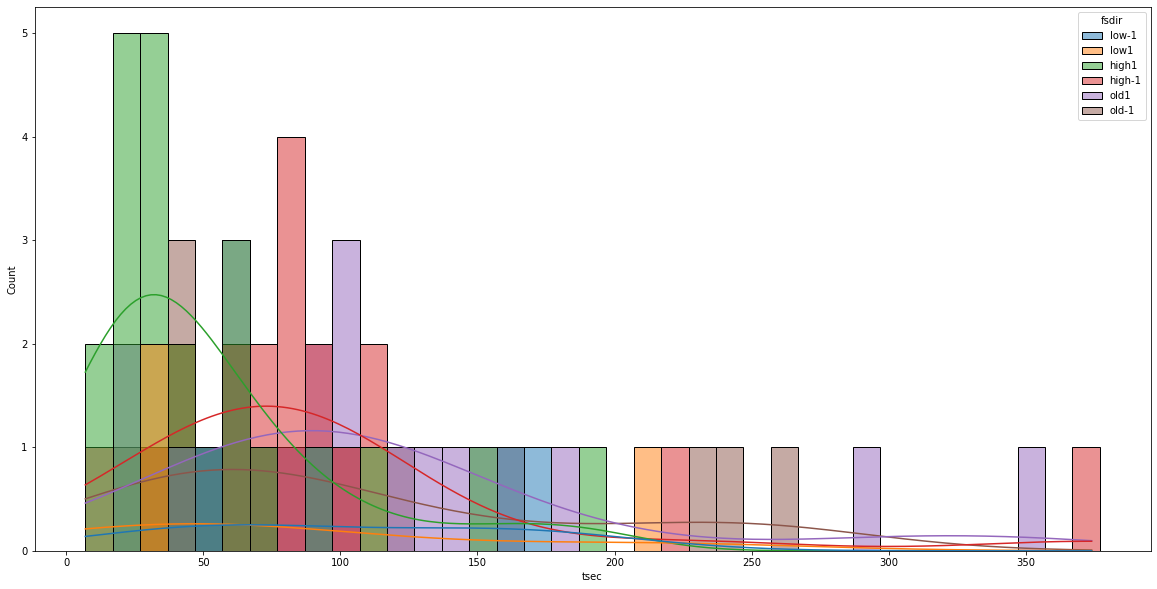

In [94]:
sns.histplot(data=finres, x='tsec', hue = 'fsdir',binwidth=10,kde=True)
plt.show()

In [ ]:
sns.histplot(data=finres, x='tsec', hue = 'fsdir',binwidth=10,kde=True)
plt.show()

sns.histplot(data=finres, x='abs1', hue = 'fsdir' ,binwidth=1,kde=True)
plt.show()

sns.histplot(data=finres, x='abs10', hue = 'fsdir' ,binwidth=1,kde=True)
plt.show()

sns.histplot(data=finres, x='abs5', hue = 'fsdir' ,binwidth=1,kde=True)
plt.show()

sns.countplot(data=finres, x='info', hue = 'fsdir' )
plt.show()


In [67]:
#5 second mean value at the turning point

g1 = finres[(finres['fs']=='high') & (finres['fishtype']=='farmed_loch')]['abs5'].dropna()
g2 = finres[(finres['fs']=='high') & (finres['fishtype']=='wild')]['abs5'].dropna()

print(np.var(g1), np.var(g2))
stats.ttest_ind(a=g1, b=g2, equal_var=True)


49.9191 17.995069252077556


Ttest_indResult(statistic=-0.1100050660764942, pvalue=0.9129998634013771)

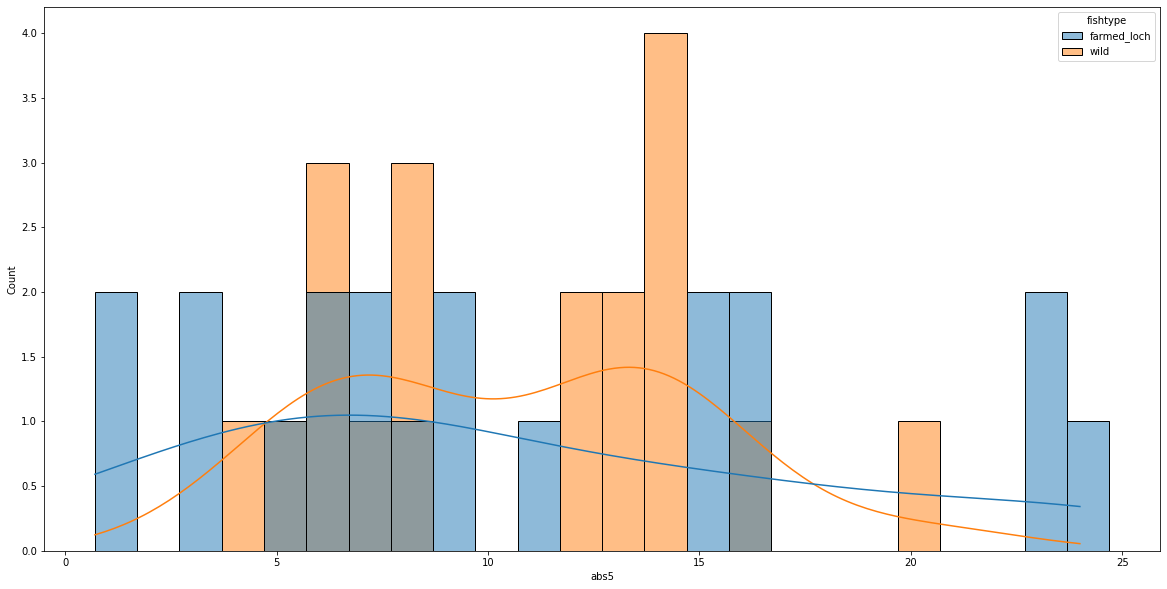

In [92]:
sns.histplot(data=finres[(finres['fs']=='high')], x='abs5', hue = 'fishtype' ,binwidth=1,kde=True)
plt.show()

In [87]:
finres[(finres['fs']=='high') & (finres['direction']==1)]

,fishname,fs,fishdate,time_flow,time_react,tdiff,info,info_other,direction,stable10prev,...,change1,asfractprev5,asfractprev10,tsec,abs1,abs5,abs10,fsdir,absstable10,fdistcm
16,fish82,high,27/03/2021,09:36:21,x,NaN,unstable,unstable,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high1,NaN,NaN
19,fish96,high,27/03/2021,16:41:00,x,NaN,unstable,unstable,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high1,NaN,NaN
20,farmed97,high,28/03/2021,12:49:18,x,NaN,unstable,unstable,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high1,NaN,NaN
22,farmed105,high,28/03/2021,16:29:55,16:31:26,00:01:31,no_reaction,dir change and swim off,1,NaN,...,NaN,NaN,NaN,91.0,NaN,NaN,NaN,high1,NaN,NaN
24,farmed107,high,28/03/2021,17:25:04,x,NaN,unstable,unstable,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high1,NaN,NaN
25,farmed109,high,28/03/2021,18:19:28,x,NaN,unstable,unstable,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high1,NaN,NaN
28,wild9,high,03/05/2021,16:58:10,x,NaN,no_reaction,it is first sideways accrosss...,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high1,NaN,NaN
30,wild16,high,04/05/2021,13:52:26,x,NaN,no_reaction,it is first sideways accrosss...,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high1,NaN,NaN
31,wild22,high,05/05/2021,10:50:23,x,NaN,no_reaction,no change,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high1,NaN,NaN
33,wild24,high,05/05/2021,11:45:19,x,NaN,no_reaction,no change,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high1,NaN,NaN


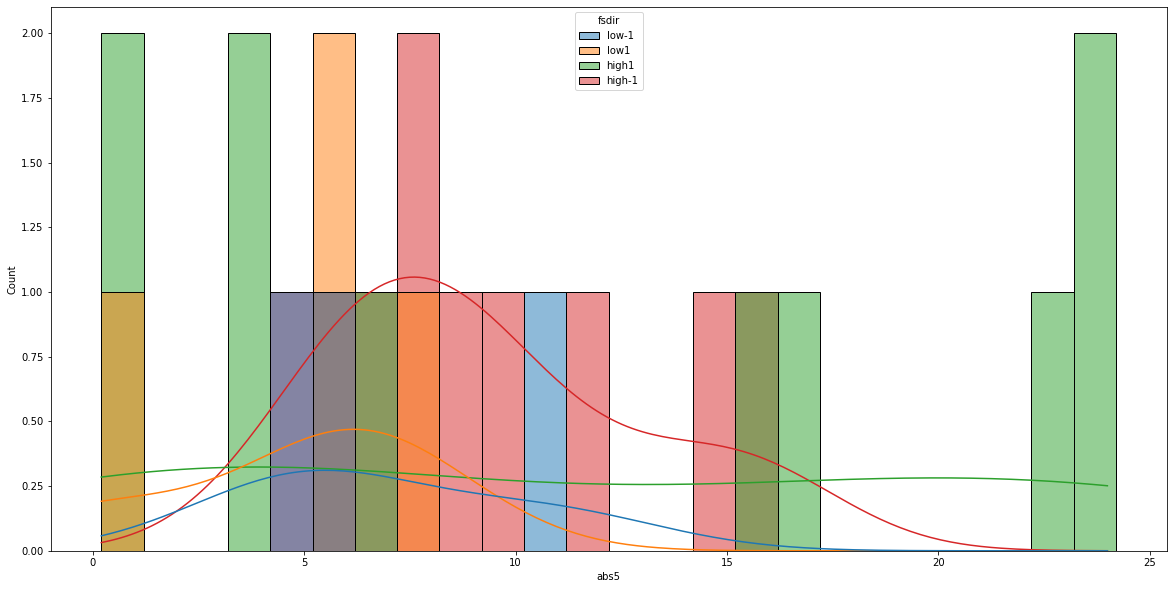

In [93]:
sns.histplot(data=finres[(finres['fishtype']=='farmed_loch')], x='abs5', hue = 'fsdir' ,binwidth=1,kde=True)
plt.show()